# The aim of this project is to scrape tweets that mention the three most popular presidential candidates(Bola Tinubu,Atiku Abubakar,Peter Obi )  on twitter using twint API and perform sentiment analysis on the tweet to check the polarity(positivity,negativity,neutralility) and subjectivity of the tweets with respect to each candidate

In [1]:
#importing all the neccessary libraries
import twint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords  
import glob                     
import os
import nest_asyncio

In [10]:
#A dictionary of the 3 popular parties and there candidates
popular_presidential_candidate={
    'APC':'Bola Tinubu ',
    'PDP':'Atiku Abubakar',
    'LP':'Peter Obi'
}

In [4]:
nest_asyncio.apply()

In [18]:
#A function to perform the twint configuration
def configtwint(search_value):
    c = twint.Config()
    c.Search =search_value
    c.Since = '2022-01-01'
    c.Until = '2023-02-02'
    c.Limit = 500
    c.Store_object = True
    c.Pandas =True
    c.Lang = 'en'
    twint.run.Search(c)


In [19]:
#A function to loop through the dictionary and search for each canditate on twitter and then save as a dataframe
def get_tweets(CandidateName):
    final_df=pd.DataFrame()
    for candidate in CandidateName.items():
        configtwint(candidate)
        df=twint.storage.panda.Tweets_df
        df["canditate"]= candidate[0]
        final_df=pd.concat([final_df,df])
    return final_df

In [20]:
#Calling the function and saving the scaped data in a variable called df 
df=get_tweets(popular_presidential_candidate)

1620921215753011200 2023-02-02 00:05:07 +0100 <E4two1> There are presidential candidates and there are comedians pretending to be dancers and Asiwaju Bola  Tinubu is an APC comedian and not an aspirant.  He can be competing with Sabinus for stand up comedy. Peter Obi is coming. OBIDIENTS VAWULENCE department is ready 4 Adamu  https://t.co/vDI6oQBLNl
1620914288180477953 2023-02-01 23:37:36 +0100 <makesensepromot> The Federal Government has said it was not officially aware of any official in ASO Rock working against the presidential candidate of the All Progressives Congress (APC), Bola Tinubu as claimed by Kaduna State governor, Nasir El-Rufai.  #makesensepromotions  https://t.co/36dWvykfLb
1620900688925712384 2023-02-01 22:43:33 +0100 <StrawberryNG> The presidential candidate of the Peoples Democratic Party (PDP), Atiku Abubakar, has berated the presidential candidate of the All Progressives Congress (APC), Bola Tinubu, for his hypocritical attempts to extricate himself from the many f

In [21]:
df.shape

(1393, 39)

In [22]:
#removing the irrelevant columns that came with the scraped tweets
df = df.drop(['id', 'conversation_id', 'timezone', 'place', 'cashtags', 'language', 'name', 'search', 'hashtags','user_id', 'day', 'hour', 'created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
        'thumbnail', 'retweet','nreplies', 'nretweets', 'quote_url', 'near', 'geo', 'source',  'username', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest','nlikes'],axis = 1)

In [23]:
df.head(20)

,date,tweet,canditate
0,2023-02-02 00:05:07,There are presidential candidates and there ar...,APC
1,2023-02-01 23:37:36,The Federal Government has said it was not off...,APC
2,2023-02-01 22:43:33,The presidential candidate of the Peoples Demo...,APC
3,2023-02-01 22:11:48,@naijassador @officialABAT @Atiku_Nig_2023 @Kw...,APC
4,2023-02-01 22:02:34,The Kaduna governor had said some elements are...,APC
5,2023-02-01 21:49:57,BOLA TINUBU UNSTOPPABLE IN SPITE CONSPIRACY IN...,APC
6,2023-02-01 21:28:27,Governor Nasir El-Rufai of Kaduna State has sa...,APC
7,2023-02-01 21:25:58,"Mai dakin shugaban kasa, Aisha Buhari, ta saki...",APC
8,2023-02-01 21:22:45,Aisha Buhari reposts El-Rufai’s claim on gang ...,APC
9,2023-02-01 21:13:43,"Aisha, the wife of President Muhammadu Buhari,...",APC


In [24]:
import re

In [25]:
#a function that will help clean the scaped tweets with the use of regular expression
def clean_text(text):  
    pat1 = r'@[^abc]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet except
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [27]:
#Applying the cleaning function on the tweets column
df["tweet"] =df["tweet"].apply(clean_text)

In [28]:
#A function to calculate the polarity and subjectivity of each candidate
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Subjectivity"] =df['tweet'].apply(getSubjectivity)
df["Polarity"] = df['tweet'].apply(getPolarity)

In [11]:
pd.set_option('display.max_rows', 10000)


In [29]:
df

,date,tweet,canditate,Subjectivity,Polarity
0,2023-02-02 00:05:07,there are presidential candidates and there ar...,APC,0.500000,0.200000
1,2023-02-01 23:37:36,the federal government has said it was not off...,APC,0.250000,0.250000
2,2023-02-01 22:43:33,the presidential candidate of the peoples demo...,APC,0.500000,0.500000
3,2023-02-01 22:11:48,aijassador cialabat ankwasorm bi bola tinubu,APC,0.000000,0.000000
4,2023-02-01 22:02:34,the kaduna governor had said some elements are...,APC,0.000000,0.000000
...,...,...,...,...,...
501,2023-02-01 17:04:33,coming election will surely be different from ...,LP,0.666667,0.033333
502,2023-02-01 17:04:21,adaz bi he and the sultan are friends,LP,0.000000,0.000000
503,2023-02-01 17:04:06,i and my family are voting bi ampabour and we ...,LP,0.613636,0.034091
504,2023-02-01 17:03:23,areakinkuade bi vote wisely vote for lp all th...,LP,0.900000,0.700000


Text(0, 0.5, 'polarity')

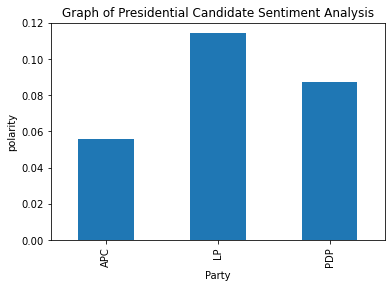

In [37]:
#A graph to show the polarity of each canditate visually
df.groupby('canditate')['Polarity'].mean().plot(kind='bar')
plt.title('Graph of Presidential Candidate Sentiment Analysis')
plt.xlabel('Party')
plt.ylabel('polarity')

## Conclusion
This graph shows that Labour party candidate(Peter Obi) has the highest positivity on twitter followed by PDP candidate(Atiku Abubakar),then APC candidate has the least positive tweets 